Plots path taken by Newton and Broyden iterates, starting from initial
value (1.0.,0.5), in solving bivariate rootfining problem

\begin{align*}
ye^x - 2y &= 0 \\
xy - y^3=0
\end{align*}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from compecon import NLP, gridmake

## Set Initial Value and Max Iterations


In [2]:
xinit = [1.0, 0.5]
niter = 10

## Define objective function and set up the NLP

In [3]:
def f(z):
    x, y = z
    fval = [y*np.exp(x) - 2*y, x*y-y**3]
    fjac = [[y*np.exp(x), np.exp(x)-2], [y, x - 3*y**2]]
    return fval, fjac

problem = NLP(f)    

### Newton solution

In [4]:
paths = dict()

problem.newton(xinit, all_x=True)
paths['newton'] = problem.x_sequence

### Broyden solution

In [5]:
problem.broyden(xinit, all_x=True)
paths['broyden'] = problem.x_sequence

## Plot solution

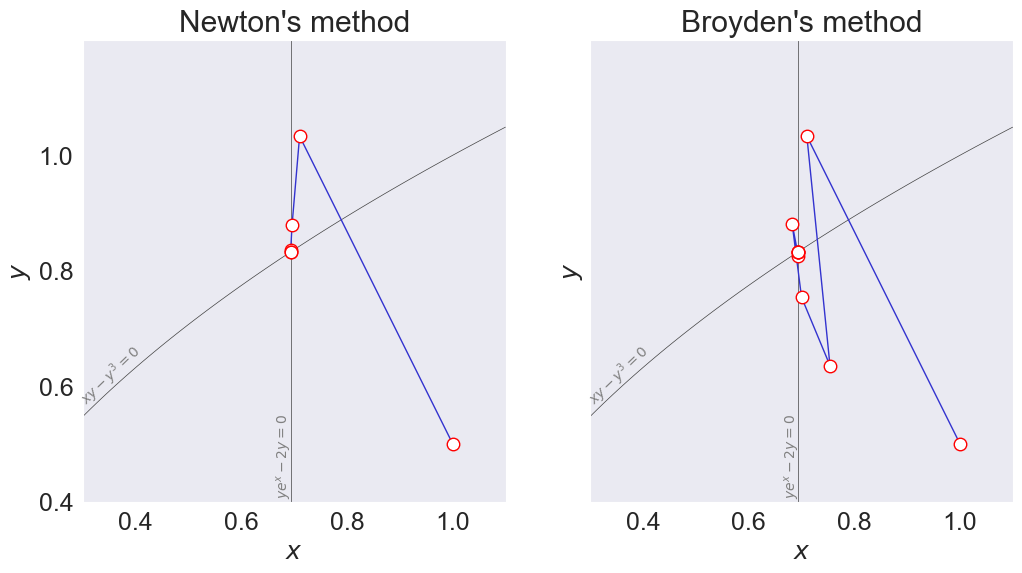

In [6]:
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 1.0,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
                   'colors': '0.25',
                   'linewidths': 0.5}

annotate_options = dict(ha='right', va='center', color="gray", size=10)




methods = ['newton', 'broyden']
problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

xmin, xmax = 0.3, 1.1
ymin, ymax = 0.4, 1.2

n=100

x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(x, y)

Z0, Z1 = f(np.c_[X.ravel(), Y.ravel()].T)[0]
Z0.resize((n,n))
Z1.resize((n,n))


fig, axs = plt.subplots(1,2,figsize=[12,6], sharey=True)
for ax, method in zip(axs, methods):
    ax.set(title=method.capitalize() + "'s method",
           xlabel='$x$',
           ylabel='$y$',
           xlim=[xmin, xmax],
           ylim=[ymin, ymax]
           )
    ax.contour(X, Y, Z0, **contour_options)
    ax.contour(X, Y, Z1, **contour_options)
    ax.plot('x_0', 'x_1', data=paths[method], **steps_options)
    ax.annotate('$ye^x - 2y = 0$', (0.70, 0.48), rotation=90, **annotate_options)
    ax.annotate('$xy - y^3 = 0$', (0.42, 0.62),  rotation=44, **annotate_options)

axs[0].set(yticks=[0.4,0.6,0.8,1.0]);

    

## The solution is very sensitive to initial guess

In [7]:
xinitvals = np.c_[X.ravel(), Y.ravel()]

In [8]:
n=200

xsol = np.log(2)
ysol = np.sqrt(xsol)


x = np.linspace(-xsol-1.5, xsol+1.5, n)
y = np.linspace(-1.5, 1.5, n)
X, Y = np.meshgrid(x, y)

xinitvals = np.c_[X.ravel(), Y.ravel()]

solutions = pd.DataFrame(
    [NLP(f).newton(xinit, all_x=True) for xinit in xinitvals],
    index= pd.MultiIndex.from_arrays(xinitvals.T),
    columns=['x', 'y']
)
solutions.index.names = ['x0', 'y0']

In [9]:
solutions.loc[np.isclose(solutions['y'], 0), 'y'] = 0.0
solutions.loc[np.isclose(solutions['y'], ysol), 'y'] = ysol
solutions.loc[np.isclose(solutions['y'], -ysol), 'y'] = -ysol
solutions.loc[np.isclose(solutions['x'], xsol), 'x'] = xsol

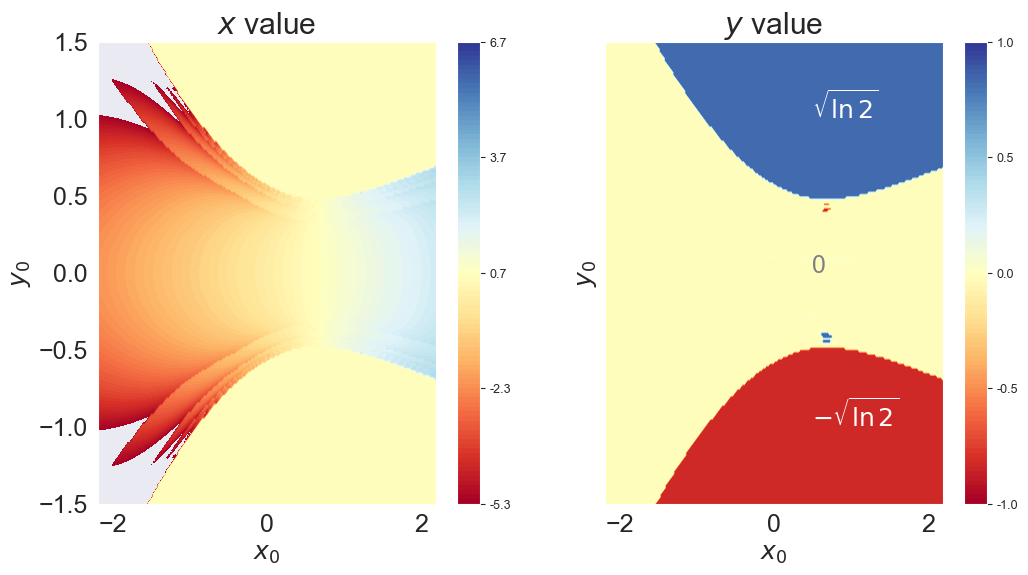

In [10]:
fig, axs = plt.subplots(1,2, sharey=True)

cont0 = axs[0].contourf(X,Y, solutions['x'].values.reshape(n,n), levels=np.linspace(xsol-6,xsol+6,101), cmap='RdYlBu')
axs[0].set(xlabel='$x_0$', ylabel='$y_0$', title="$x$ value")
cax0 = fig.colorbar(cont0, ax=axs[0], format='%.1f')
cax0.set_ticks([xsol-6,xsol-3,xsol,xsol+3,xsol+6])
cax0.set_ticklabels([f'{a:.1f}' for a in cax0.get_ticks()], fontsize=9)


cont1 = axs[1].contourf(X,Y, solutions['y'].values.reshape(n,n), levels=np.linspace(-1,1, 101), cmap='RdYlBu')
axs[1].set(xlabel='$x_0$', ylabel='$y_0$', title="$y$ value")
axs[1].annotate('$\sqrt{\ln{2}}$', (0.5,1.0), color='white')
axs[1].annotate('$-\sqrt{\ln{2}}$', (0.5,-1.0), color='white')
axs[1].annotate('0', (0.5,0.0), color='gray')
cax1 = fig.colorbar(cont1, ax=axs[1], format='%.1f')
cax1.set_ticks([-1,-0.5, 0,0.5,1.0])
cax1.set_ticklabels([f'{a:.1f}' for a in cax1.get_ticks()], fontsize=9)

#fig.suptitle("Solution found by Newton's method, depending on initial value ($x_0, y_0$)")
#fig.colorbar(axs)

In [11]:
x = np.linspace(xsol-0.15, xsol+0.15, n)
y = np.linspace(0.3, 0.6, n)
X, Y = np.meshgrid(x, y)

xinitvals = np.c_[X.ravel(), Y.ravel()]

solutions = pd.DataFrame(
    [NLP(f).newton(xinit, all_x=True) for xinit in xinitvals],
    index= pd.MultiIndex.from_arrays(xinitvals.T),
    columns=['x', 'y']
)
solutions.index.names = ['x0', 'y0']

solutions.loc[np.isclose(solutions['y'], 0), 'y'] = 0.0
solutions.loc[np.isclose(solutions['y'], ysol), 'y'] = ysol
solutions.loc[np.isclose(solutions['y'], -ysol), 'y'] = -ysol
solutions.loc[np.isclose(solutions['x'], xsol), 'x'] = xsol

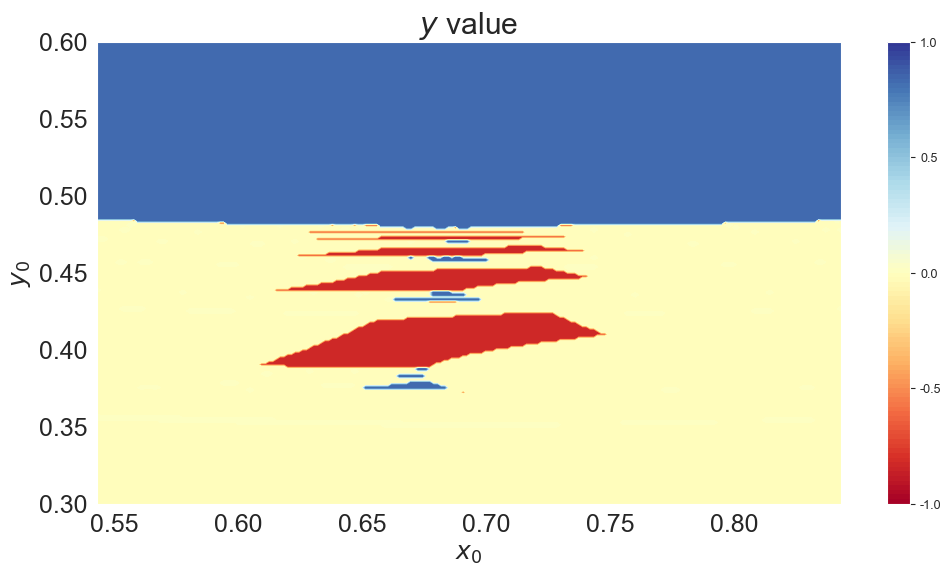

In [12]:
fig, ax = plt.subplots()

cont1 = ax.contourf(X,Y, solutions['y'].values.reshape(n,n), levels=np.linspace(-1,1, 101), cmap='RdYlBu')
ax.set(xlabel='$x_0$', ylabel='$y_0$', title="$y$ value")
ax.annotate('$\sqrt{\ln{2}}$', (0.5,1.0), color='white')
ax.annotate('$-\sqrt{\ln{2}}$', (0.5,-1.0), color='white')
ax.annotate('0', (0.5,0.0), color='gray')
cax1 = fig.colorbar(cont1, ax=ax, format='%.1f')
cax1.set_ticks([-1,-0.5, 0,0.5,1.0])
cax1.set_ticklabels([f'{a:.1f}' for a in cax1.get_ticks()], fontsize=9)

#fig.suptitle("Solution found by Newton's method, depending on initial value ($x_0, y_0$)")
#fig.colorbar(axs)